In [1]:
import tensorflow as tf
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
from keras.optimizers import Adam
import numpy as np
from PIL import Image
import os

In [2]:
features = []      
targets = []
c_dir = os.getcwd() 

In [3]:
for i in range(6):
    path = os.path.join(c_dir,'Food','training',str(i))
    images = os.listdir(path)
    for a in images:
        img = Image.open(path + '\\' + a)
        img = img.resize((124, 124))
        img = np.array(img)
        features.append(img)
        targets.append(i)

In [4]:
x_train = np.array(features)
y_train = np.array(targets)

In [5]:
features = []      
targets = []

In [6]:
for i in range(6):
    path = os.path.join(c_dir,'Food','test',str(i))
    images = os.listdir(path)
    for a in images:
        img = Image.open(path + '\\' + a)
        img = img.resize((124, 124))
        img = np.array(img)
        features.append(img)
        targets.append(i)

In [7]:
x_test = np.array(features)
y_test = np.array(targets)

In [8]:
x_test.shape, y_test.shape

((2736, 124, 124, 3), (2736,))

In [9]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape

((6089, 6), (2736, 6))

In [10]:
model = Sequential()

model.add(Conv2D(8, (2,2), activation='relu', input_shape=(124, 124, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (2,2), activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (4,4), activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(124, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [11]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size = 32, epochs = 15)

Epoch 1/15
191/191 [==============================] - 68s 204ms/step - loss: 8.5787 - accuracy: 0.2579
Epoch 2/15
191/191 [==============================] - 39s 207ms/step - loss: 1.5740 - accuracy: 0.3665
Epoch 3/15
191/191 [==============================] - 39s 205ms/step - loss: 1.3882 - accuracy: 0.4664
Epoch 4/15
191/191 [==============================] - 39s 202ms/step - loss: 1.2275 - accuracy: 0.5294
Epoch 5/15
191/191 [==============================] - 39s 203ms/step - loss: 1.1574 - accuracy: 0.5499
Epoch 6/15
191/191 [==============================] - 36s 187ms/step - loss: 0.9752 - accuracy: 0.6401
Epoch 7/15
191/191 [==============================] - 36s 191ms/step - loss: 0.8400 - accuracy: 0.6971
Epoch 8/15
191/191 [==============================] - 39s 206ms/step - loss: 0.6448 - accuracy: 0.7671
Epoch 9/15
191/191 [==============================] - 39s 203ms/step - loss: 0.6207 - accuracy: 0.7724
Epoch 10/15
191/191 [==============================] - 39s 202ms/step - l

In [12]:
classes = { 0:'Fried Food', 
            1:'Meat', 
            2:'Noodles-Pasta',             
            3:'SeaFood',
            4:'Soup', 
            5:'Vegetable-Fruit', 
            }

In [13]:
y_pred=model.predict(x_test)
y_pred_arg=[np.argmax(i) for i in y_pred]
y_test_arg=[np.argmax(i) for i in y_test]

In [14]:
model.evaluate(x_test,y_test)

86/86 [==============================] - 7s 69ms/step - loss: 1.7159 - accuracy: 0.6279


[1.7159309387207031, 0.6279239654541016]

In [18]:
import seaborn as sn 
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [19]:
cm=tf.math.confusion_matrix(labels=y_test_arg,predictions=y_pred_arg)
cm

<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[198, 102,  29,  58,  94,  32],
       [ 30, 378,   6,  59,  36,  17],
       [ 30,  25, 112,  16,  57,  23],
       [ 29,  74,   6, 357,  41,  73],
       [ 44,  41,  16,  31, 424,  13],
       [  6,   9,   0,  17,   4, 249]])>

Text(51.0, 0.5, 'Truth')

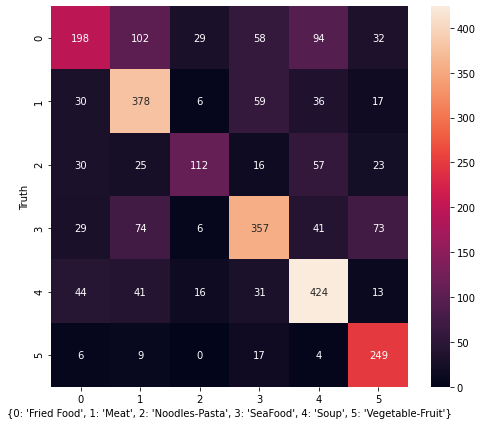

In [20]:
plt.figure(figsize=(8, 7))
sn.heatmap(cm, annot=True,fmt='d')
plt.xlabel(classes)
plt.ylabel('Truth')

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test_arg,y_pred_arg))

              precision    recall  f1-score   support

           0       0.59      0.39      0.47       513
           1       0.60      0.72      0.65       526
           2       0.66      0.43      0.52       263
           3       0.66      0.62      0.64       580
           4       0.65      0.75      0.69       569
           5       0.61      0.87      0.72       285

    accuracy                           0.63      2736
   macro avg       0.63      0.63      0.61      2736
weighted avg       0.63      0.63      0.62      2736



Soup


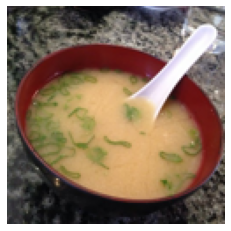

In [57]:
features = []     

path = os.path.join(c_dir,'Food','New')
images = os.listdir(path)
for a in images:
    img = Image.open(path + '\\' + a)
    img = img.resize((124, 124))
    img = np.array(img)
    features.append(img)
    
plt.axis('off')
im=np.array(features)
plt.imshow(im[5])
pred = model.predict(im)
predicted=[np.argmax(i) for i in pred]


plt.imshow(im[4])
print(classes[predicted[4]])

In [59]:
model.save('Food_categories_5.h5')

<h1>Loading model and checking <h1>

In [1]:
from keras.models import load_model

In [2]:
model=load_model('Food_categories_5.h5')

In [3]:
classes = { 0:'Fried Food', 
            1:'Meat', 
            2:'Noodles-Pasta',             
            3:'SeaFood',
            4:'Soup', 
            5:'Vegetable-Fruit', 
            }

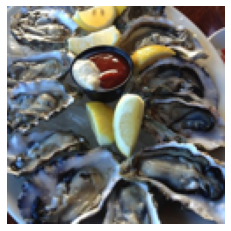

In [12]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
features = []     
c_dir = os.getcwd() 

path = os.path.join(c_dir,'Food','New')
images = os.listdir(path)
for a in images:
    img = Image.open(path + '\\' + a)
    img = img.resize((124, 124))
    img = np.array(img)
    features.append(img)
    
plt.axis('off')
im=np.array(features)
plt.imshow(im[5])
pred = model.predict(im)
predicted=[np.argmax(i) for i in pred]
plt.imshow(im[0])
print("Predicted=",classes[predicted[0]])